### Let us start the project by <u>importing various liberaries</u> that we are going to take the advantages of. The best part of using python for programming is the amazing open source community that support pythin and the large number of liberaries that python has.

## <a url='https://pandas.pydata.org'> Pandas</a>
### pandas is a data manipulation tool

In [1]:
import pandas as pd 

## <a url='https://matplotlib.org/3.2.1/contents.html'> Matplotlib</a>
### Matplotlib is a plotting library for the Python programming language

In [2]:
import matplotlib.pyplot as plt

## <a url='https://numpy.org'> Numpy</a>
### Numpy supports large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [3]:
import numpy as np

# MNIST

Modified National Institute of Standards and Technology(MNIST) database of handwritten digits is a cult classic among beginers and due to good reason. It is learge enough for training deep neural networks and yet small enough to be managable. It is rather straight forward concept, recognize handwritten digits. 

#### Reading the data using <a url='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html'> pandas.read_csv()</a> as our data is in form  <a url='https://en.wikipedia.org/wiki/Comma-separated_values'> .csv</a> ie comma separated train_dataiables 

In [4]:
train_data=pd.read_csv('mnist_train.csv')

In [5]:
test=pd.read_csv('mnist_test.csv')

#### <a url='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html'> pd.DataFrame.head() </a> used for frinting the top 5 rows of data

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### <a url = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html'>pd.Dataframe.shape</a> returns the dimentions of the data as a tuple

In [7]:
train_data.shape

(42000, 785)

42000 are the total number of rows and 785 are the number of columns.
Each row corresponds to one training example.
The column label has the the value of the Label ie the class of the image
Rest of the 784 columns contain the pixel values for the black and white image

#### In supervised learning, the two broad parts of the data are: <br>1. The features(x)- the data used to make predictions<br>2. The label(y)- the data that needs to be predicted using the features

In [8]:
#pd.DataFrame.Column_name can be used to get all values of the column Column_name of the dataframe DataFrame
y=train_data.label 

In [9]:
y.shape

(42000,)

#### <a url = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.htmll'>pd.Dataframe.drop()</a> drops specified labels from rows or columns.

In [10]:
x=train_data.drop('label',axis=1)

# Plotting of data

#### Let us use the above mentioned plotting liberary to plot some of the data. Note that we have 784 values of pixels. So we first need to put it in a format that resembles that of an image. It is actually a 28*28 image.<br> Let us plot the 1st training example.

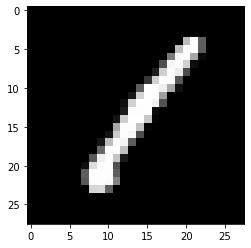

1


In [11]:
#using pd.DataFrame.iloc[0] to get the 0th index row of x:
row0=x.iloc[0]

#converting it into a numpy array using np.array()
img=np.array(row0)

#reshaping the (784,) shaped image to its original 28*28 shape
img=img.reshape(28,28)

#plotting the image using matplotlib.pyplot.imshow() 
plt.imshow(img,cmap='gray')
plt.show()
print(y.iloc[0])

#### The pixel values range from 0-255. This is because modern computers use 8-bit color. 

In [12]:
x/=255

#### What we have done above is a common practice in Machine Learning called Normalization of features. <a url='https://en.wikipedia.org/wiki/Feature_scaling'> more info</a>. We have brought all the features between the values 0 and 1. This makes it easy for us to visualize the data and helps machine learning models to fit the data.

## Splitting the data into train and test

sklearn.model_selection.train_test_split is function used to split the training data into 2 parts, the train part is used for training the model and the test part is used to validate the model. <a url='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'> more info</a>.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=1)

## <a url= 'https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>KNN</a>
#### k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. 

#### Suppose there are two categories, blue squares and red triangles, and we have a new data point i.e the green circle. Now the question arises is that this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/440px-KnnClassification.svg.png'>

#### As we can see that the green circle has 2 red triangles close and only one blue square, it is a red triangle

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#creating our K-NN model
k=KNeighborsClassifier(n_neighbors=3) 

In [17]:
#fitting the model using train data from train_test_split
k.fit(x1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
#validating the model using the test data from train_test_split
k.score(x2,y2) 

0.9675

#### K-NN is great, it is easy but we might get better accuracy by just using a different ML algorithm.

# <a url='https://scikit-learn.org/stable/modules/svm.html'> SVM</a>

#### SVM is a supervised machine learning algorithm which can be used for classification or regression problems. <br>It uses complex transformations of the data to figure out complex relations between the data. 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/440px-Svm_separating_hyperplanes_%28SVG%29.svg.png'>

#### H1 does not separate the classes. H2 does, but only with a small margin. H3 separates them with the maximal margin.

#### <br>Support Vector Machine is primarily used for Classification problems in Machine Learning. <br>The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
for more info refer: https://scikit-learn.org/stable/modules/svm.html

In [19]:
from sklearn.svm import SVC

In [20]:
#creating the classification model of SVM using scikit learn
s=SVC()

In [21]:
#fitting the model using the train data.
s.fit(x1,y1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
#validating the SVM model
s.score(x2,y2) 

0.9780952380952381

#### We see that without changing anything, without any extra effort we get a better result using SVM compared to K-NN. This shows us that using the correct algorithm for a problem is the key to getting better result. This might be worth noting that K-NN might perform better at some other problem.

# Deep Learning 

Deep Learning is a subset of Machine Learning that has networks capable of learning unsupervised from data that is unstructured or unlabeled. In Deep Learning, a computer model learns to perform classification tasks directly from images, text, or sound.<br>

Image processing, Computer vision are all possible due to the capabilities deep learning.<br>
As we discussed earlier, this is also image procession so deep learning sounds like a viable option

## CNN

#### Neural Networks are a set of algorithms, modelled loosely after the human brain, that is designed to recognize patterns.<br>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/790px-Typical_cnn.png'>



### A Convolutional Neural Network (CNN) is a class of deep neural networks for analysing visual imagery. It is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. 

### <a url='https://www.tensorflow.org/tutorials/images/cnn'> Tensorflow</a>

#### TensorFlow is Google Brain's second-generation system. It is used for machine learning applications such as neural networks.

#### <a url ='https://www.tensorflow.org/guide/keras'>tf.keras</a> is TensorFlow's high-level API for building and training deep learning models.

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [24]:
#initialize the model refer: https://keras.io/api/models/sequential/
model=models.Sequential() 

#Adding Convolution layer followed by maxpool layer: refer- https://keras.io/api/layers/convolution_layers/convolution2d/
model.add(layers.Conv2D(32, (3, 3), strides=1, padding='same',activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1,))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())

#Adding a fully connected layer:
model.add(layers.Dense(64, activation='relu'))

#Adding the output layer with 10 neurons/nodes:
model.add(layers.Dense(10, activation='softmax'))

In [25]:
#reshaping the train data in form of the image of 28*28
x1=np.array(x1).reshape(-1,28,28,1) 

In [26]:
y1=np.array(y1)

In [27]:
x2=np.array(x2).reshape(-1,28,28,1)

In [28]:
y2=np.array(y2)

In [29]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x1, y1, epochs=10, validation_data=(x2, y2))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 40s 1ms/sample - loss: 1.5541 - accuracy: 0.9093 - val_loss: 1.4953 - val_accuracy: 0.9664
Epoch 2/10
33600/33600 [==============================] - 42s 1ms/sample - loss: 1.4899 - accuracy: 0.9716 - val_loss: 1.4842 - val_accuracy: 0.9770
Epoch 3/10
33600/33600 [==============================] - 44s 1ms/sample - loss: 1.4842 - accuracy: 0.9770 - val_loss: 1.4893 - val_accuracy: 0.9715
Epoch 4/10
33600/33600 [==============================] - 42s 1ms/sample - loss: 1.4814 - accuracy: 0.9797 - val_loss: 1.4888 - val_accuracy: 0.9727
Epoch 5/10
33600/33600 [==============================] - 42s 1ms/sample - loss: 1.4790 - accuracy: 0.9822 - val_loss: 1.4845 - val_accuracy: 0.9765
Epoch 6/10
33600/33600 [==============================] - 41s 1ms/sample - loss: 1.4793 - accuracy: 0.9819 - val_loss: 1.4772 - val_accuracy: 0.9842
Epoch 7/10
33600/33600 [==============================] -

### Performing prediction on the test data

In [30]:
# changing shape of dataframe test to so that model can read it as an image
test = np.array(test/255).reshape(-1, 28, 28, 1)

In [31]:
pred=model.predict(test)

In [32]:
prediction=[]
for i in pred:
    prediction.append(list(i).index(max(i)))

In [33]:
prediction

[2,
 0,
 9,
 0,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 0,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 5,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 3,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,
